In [ ]:
#pandas and NumPy 
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For graphs
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
#sns.set_style('whitegrid')
%matplotlib inline

# We obtain data from yahoo finance from Datareader function in pandas 
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

from __future__ import division

In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['TSLA','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(year=end.year - 1,month=end.month,day=end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [ ]:
# descriptive statistics of Tesla share values from today to one year ago
TSLA.describe()

,High,Low,Open,Close,Volume,Adj Close
count,255.000000,255.000000,255.000000,255.000000,2.550000e+02,255.000000
mean,849.023056,811.919923,830.612628,831.086585,2.522809e+07,831.086585
std,183.113570,168.817972,176.991644,176.278334,9.044641e+06,176.278334
min,566.210022,546.979980,552.549988,563.460022,9.800600e+06,563.460022
25%,694.255005,669.875000,682.279999,680.510010,1.887565e+07,680.510010
50%,799.000000,770.679993,781.000000,781.530029,2.371740e+07,781.530029
75%,1021.309998,954.234985,998.170013,997.690002,2.976105e+07,997.690002
max,1243.489990,1217.000000,1234.410034,1229.910034,6.285210e+07,1229.910034


<AxesSubplot:xlabel='Date'>

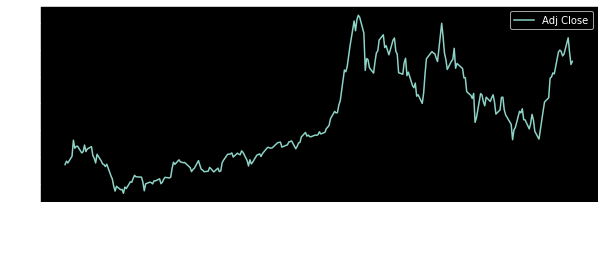

In [ ]:
#lets plot historical performance of Tesla stock:
TSLA['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

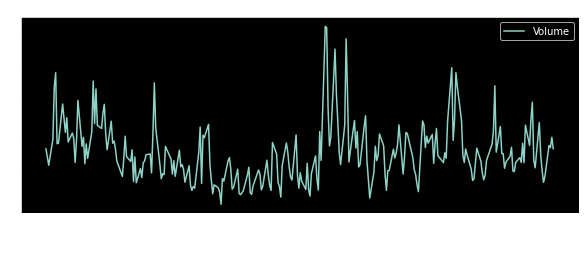

In [ ]:
#let us look at how much stock in volume is traded 
TSLA['Volume'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

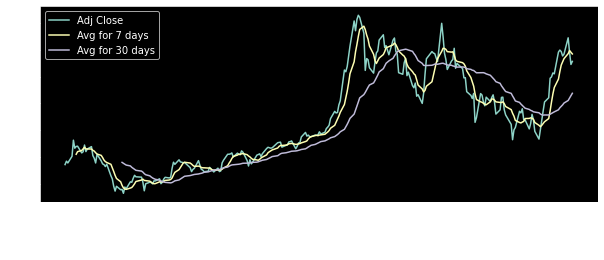

In [ ]:
#lets us look at 7day one month average returns of this stock:
avg=[7,30]
for a in avg:
    newcol='Avg for %s days' %(str(a))
    TSLA[newcol]=TSLA['Adj Close'].rolling(a).mean()
 
TSLA[['Adj Close','Avg for 7 days','Avg for 30 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

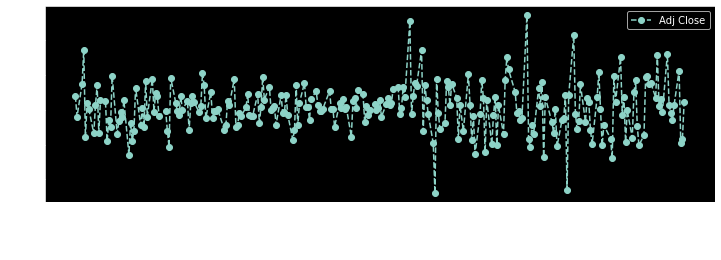

In [ ]:
#daily change in share price of tesla:
(TSLA['Adj Close'].pct_change()).plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

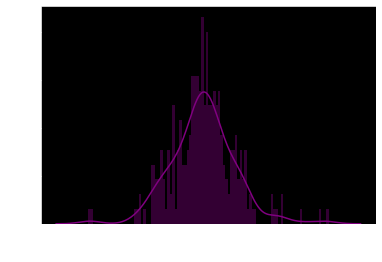

In [ ]:
#distribution of daily return over a period of year:
TSLA['Daily Return'] = TSLA['Adj Close'].pct_change()
sns.distplot(TSLA['Daily Return'].dropna(),bins=100,color='purple')



In [ ]:
# we further look and corrleation between stocks so we merge them:
Merge_stocks= DataReader(['TSLA','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']


In [ ]:
Merge_stocks.head()

Symbols,TSLA,GOOG,MSFT,AMZN
Date,,,,
2021-04-07,670.969971,2249.679932,247.880890,3279.389893
2021-04-08,683.799988,2265.439941,251.203842,3299.300049
2021-04-09,677.020020,2285.879883,253.782837,3372.199951
2021-04-12,701.979980,2254.790039,253.842331,3379.389893
2021-04-13,762.320007,2267.270020,256.401459,3400.000000


In [ ]:
daily_returns=Merge_stocks.pct_change() # to get daily returns of all stocks

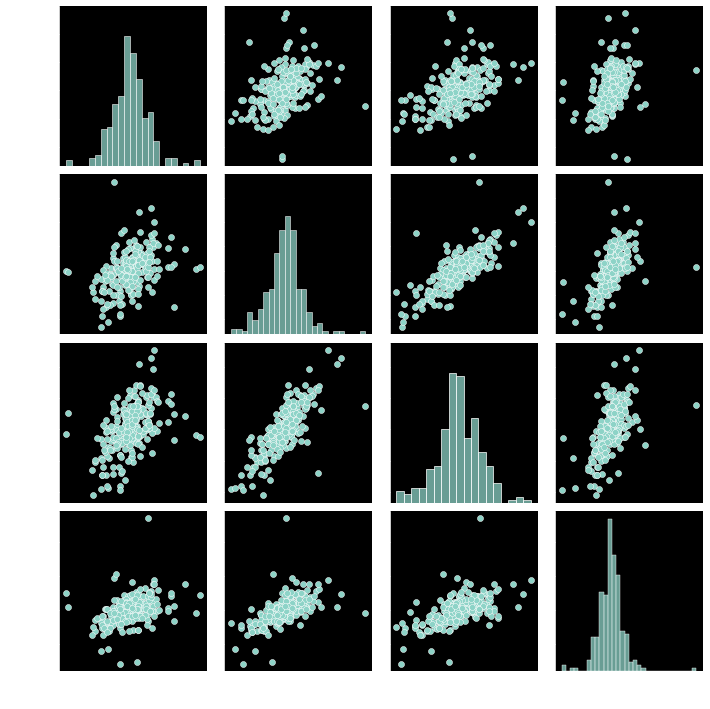

In [ ]:
#let us now look at scatter plots between all variables using pairplot
sns.pairplot(daily_returns.dropna())


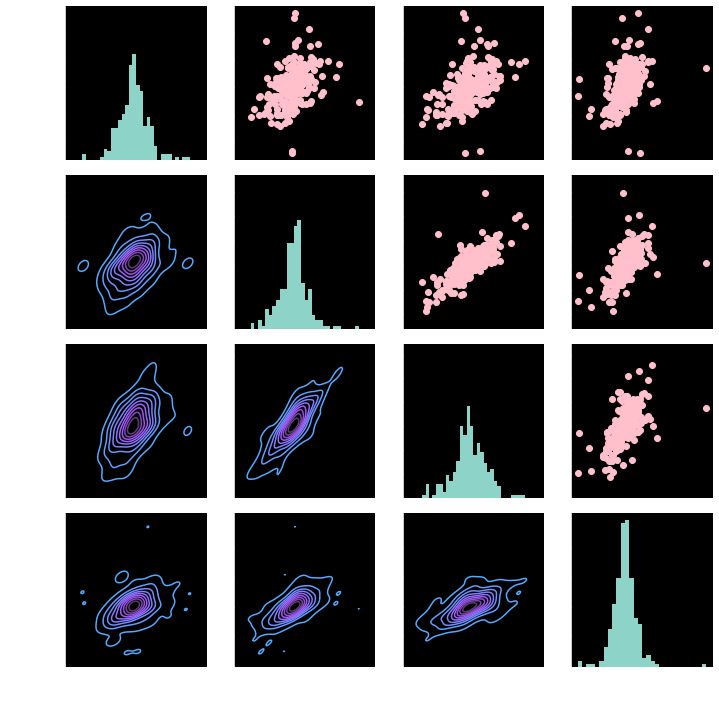

In [ ]:
#mix of kde and scatter plot

returns_fig = sns.PairGrid(daily_returns.dropna())

returns_fig.map_upper(plt.scatter,color='pink')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

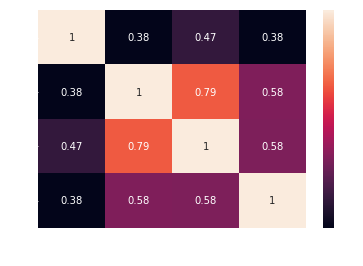

In [ ]:
#correlation matrix of our selected teh companies
sns.heatmap(daily_returns.corr(),annot=True)


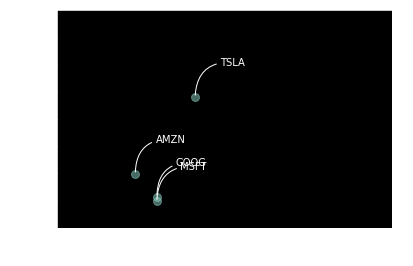

In [ ]:
# plotting risk reward graph of stocks
Merge_stocks= DataReader(['TSLA','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']
daily_returns=Merge_stocks.pct_change()
rets = daily_returns.dropna()

# Scatter plot of expected return of the stocks vs. their standard deviations of daily retunrs
area = np.pi*20

plt.scatter(x=rets.mean(), y=rets.std(),alpha = 0.5,s =area)

plt.ylim([0.01,0.05])
plt.xlim([-0.003,0.01])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.5'))

In [ ]:
list(zip(rets.columns, rets.mean()/rets.std()))

[('TSLA', 0.06952283776923686),
 ('GOOG', 0.05638567795411862),
 ('MSFT', 0.05914809520614232),
 ('AMZN', 0.002216657282469958)]